# xpath part

In [2]:
from lxml import html
from xml.etree import ElementTree
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import requests
import seaborn as sns
import statsmodels.formula.api as smf
matplotlib.style.use(['seaborn-talk', 'seaborn-ticks', 'seaborn-whitegrid'])

In [2]:
def get_flights(url):
    doc = html.fromstring(requests.get(url).text)
    flights = doc.xpath('//li[@class="flight"]')

    result = []
    for f in flights:
        
        price = f.xpath(".//div[contains@class,'bottom']")[0].text_content()
        
        entry = {          
            'price' : price
        }
        result.append(entry)
        
    return result

In [4]:
get_flights('https://www.kayak.com/flights/NYC-LAX/2018-12-22?sort=bestflight_a')

[]

In [26]:
url = "https://www.kayak.com/flights/NYC-LAX/2018-12-22?sort=bestflight_a"
response = requests.get(url) # get the html of that url
doc = html.fromstring(response.text) # parse it and create a document

flights = doc.xpath("//div[@class='bottom']")

def get_flights(airline):    
    line = airline.xpath(".//div[contains@class,'bottom']")[0].text_content()
        
    return {
        'line': line
    }

In [24]:
data = [get_flights(airline) for airline in flights]
df = pd.DataFrame(data)
df

""


In [43]:
url = 'https://www.kayak.com/flights/NYC-LAX/2018-12-22?sort=bestflight_a'
doc = html.fromstring(requests.get(url).text)
recipes = doc.xpath("//div[@class='Base-Results-HorizonResult Flights-Results-FlightResultItem phoenix-rising get-in-formation']")
recipes

[]

In [5]:
def site(airline, date):
    print("https://www.kayak.com/flights/NYC-" + str(airline) + "/" + str(date) + "?sort=bestflight_a")

In [17]:
site('LAX', '2018-12-22')

https://www.kayak.com/flights/NYC-LAX/2018-12-22?sort=bestflight_a


# url part

In [32]:
from datetime import datetime
from datetime import timedelta
import numpy as np

kayak = []
airline = 'LAX'

test = site('LAX', '2018-12-23')

#start_date = "2018-12-22"
#stop_date = "2019-01-01"

#start = datetime.strptime(start_date, "%Y-%m-%d")
#stop = datetime.strptime(stop_date, "%Y-%m-%d")
    
#while start < stop:
#    print('https://www.kayak.com/flights/NYC-' + str(airline) + '/' + str(start) + '?sort=bestflight_a')
#    start = start + np.timedelta64(1, 'D').astype(int)  # increase day one by one
    
#start_date = "2018-12-22"
#end_date = "2019-01-01"

import datetime

#start_date = "2018-12-22"
#end_date = "2019-01-01"

# The size of each step in days
day_delta = datetime.timedelta(days=1)

start_date = datetime.date(2018, 12, 22)
end_date = start_date + 11*day_delta

for i in range((end_date - start_date).days):
    sd = start_date + i*day_delta
    print('https://www.kayak.com/flights/NYC-' + str(airline) + '/' + str(sd) + '?sort=bestflight_a')
    

https://www.kayak.com/flights/NYC-LAX/2018-12-23?sort=bestflight_a
https://www.kayak.com/flights/NYC-LAX/2018-12-22?sort=bestflight_a
https://www.kayak.com/flights/NYC-LAX/2018-12-23?sort=bestflight_a
https://www.kayak.com/flights/NYC-LAX/2018-12-24?sort=bestflight_a
https://www.kayak.com/flights/NYC-LAX/2018-12-25?sort=bestflight_a
https://www.kayak.com/flights/NYC-LAX/2018-12-26?sort=bestflight_a
https://www.kayak.com/flights/NYC-LAX/2018-12-27?sort=bestflight_a
https://www.kayak.com/flights/NYC-LAX/2018-12-28?sort=bestflight_a
https://www.kayak.com/flights/NYC-LAX/2018-12-29?sort=bestflight_a
https://www.kayak.com/flights/NYC-LAX/2018-12-30?sort=bestflight_a
https://www.kayak.com/flights/NYC-LAX/2018-12-31?sort=bestflight_a
https://www.kayak.com/flights/NYC-LAX/2019-01-01?sort=bestflight_a


# function to input airline and date

In [33]:
def addAirline(airline, year, month, day):
    day_delta = datetime.timedelta(days=1)

    start_date = datetime.date(year, month, day)
    end_date = start_date + 10*day_delta

    for i in range((end_date - start_date).days):
        sd = start_date + i*day_delta
        print('https://www.kayak.com/flights/NYC-' + str(airline) + '/' + str(sd) + '?sort=bestflight_a')

In [36]:
addAirline('ORL', 2018, 12, 22)

https://www.kayak.com/flights/NYC-ORL/2018-12-22?sort=bestflight_a
https://www.kayak.com/flights/NYC-ORL/2018-12-23?sort=bestflight_a
https://www.kayak.com/flights/NYC-ORL/2018-12-24?sort=bestflight_a
https://www.kayak.com/flights/NYC-ORL/2018-12-25?sort=bestflight_a
https://www.kayak.com/flights/NYC-ORL/2018-12-26?sort=bestflight_a
https://www.kayak.com/flights/NYC-ORL/2018-12-27?sort=bestflight_a
https://www.kayak.com/flights/NYC-ORL/2018-12-28?sort=bestflight_a
https://www.kayak.com/flights/NYC-ORL/2018-12-29?sort=bestflight_a
https://www.kayak.com/flights/NYC-ORL/2018-12-30?sort=bestflight_a
https://www.kayak.com/flights/NYC-ORL/2018-12-31?sort=bestflight_a


In [30]:
#test_url = 'https://www.kayak.com/flights/NYC-' + str(airline) + '/' + str(date) + '?sort=bestflight_a&fs=stops=0'

#Vegas (LAS), LA (LAX), Chicago (CHI), SF (SFO), Orlando (ORL), 
#Denver (DEN), Washington DC (DCA), Seattle (SEA), Boston (BOS)

#5
import datetime

#start_date = "2018-12-22"
#end_date = "2019-01-01"

# The size of each step in days
day_delta = datetime.timedelta(days=1)

start_date = datetime.date(2018, 12,22)
end_date = start_date + 11*day_delta

for i in range((end_date - start_date).days):
    sd = start_date + i*day_delta
    print('https://www.kayak.com/flights/NYC-' + str(airline) + '/' + str(sd) + '?sort=bestflight_a')


2018-12-22
https://www.kayak.com/flights/NYC-LAX/2018-12-22?sort=bestflight_a
2018-12-23
https://www.kayak.com/flights/NYC-LAX/2018-12-23?sort=bestflight_a
2018-12-24
https://www.kayak.com/flights/NYC-LAX/2018-12-24?sort=bestflight_a
2018-12-25
https://www.kayak.com/flights/NYC-LAX/2018-12-25?sort=bestflight_a
2018-12-26
https://www.kayak.com/flights/NYC-LAX/2018-12-26?sort=bestflight_a
2018-12-27
https://www.kayak.com/flights/NYC-LAX/2018-12-27?sort=bestflight_a
2018-12-28
https://www.kayak.com/flights/NYC-LAX/2018-12-28?sort=bestflight_a
2018-12-29
https://www.kayak.com/flights/NYC-LAX/2018-12-29?sort=bestflight_a
2018-12-30
https://www.kayak.com/flights/NYC-LAX/2018-12-30?sort=bestflight_a
2018-12-31
https://www.kayak.com/flights/NYC-LAX/2018-12-31?sort=bestflight_a
2019-01-01
https://www.kayak.com/flights/NYC-LAX/2019-01-01?sort=bestflight_a


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
from sqlalchemy import create_engine
import geopandas as gpd
import seaborn as sns
import matplotlib as plt

In [2]:
conn_string = 'mysql://{user}:{password}@{host}/{db}?charset=utf8'.format(
    user='root', 
    password='x3rGjkz93e6CIkd7', 
    host = '35.237.252.223',  
    db='kayak'
)
engine = create_engine(conn_string)

In [3]:
total = '''
SELECT *
FROM kayak.flight
WHERE Airline = 'Delta'
    AND Destination = 'LAS'
'''
df = pd.read_sql(total, con=engine)
df

,Airline,Price,Date,Time,Timestamp,Destination,Prediction
0,Delta,367,2018-12-23,8:15 am,2018-11-29 20:02:11,LAS,We're still gathering data for this route
1,Delta,601,2018-12-23,6:13 pm,2018-11-29 20:02:11,LAS,We're still gathering data for this route
2,Delta,296,2018-12-24,7:55 pm,2018-11-29 20:02:24,LAS,Prices predicted to rise <br> <span class='pri...
3,Delta,318,2018-12-24,7:30 am,2018-11-29 20:02:24,LAS,Prices predicted to rise <br> <span class='pri...
4,Delta,350,2018-12-24,8:07 am,2018-11-29 20:02:24,LAS,Prices predicted to rise <br> <span class='pri...
5,Delta,378,2018-12-25,7:00 am,2018-11-29 20:02:35,LAS,Prices are unlikely to decrease within 7 days
6,Delta,459,2018-12-25,11:40 am,2018-11-29 20:02:35,LAS,Prices are unlikely to decrease within 7 days
7,Delta,465,2018-12-25,9:30 am,2018-11-29 20:02:35,LAS,Prices are unlikely to decrease within 7 days
8,Delta,1236,2018-12-28,10:00 am,2018-11-29 20:03:52,LAS,Prices are unlikely to decrease within 7 days
9,Delta,238,2018-12-29,8:35 pm,2018-11-29 20:04:27,LAS,We're still gathering data for this route


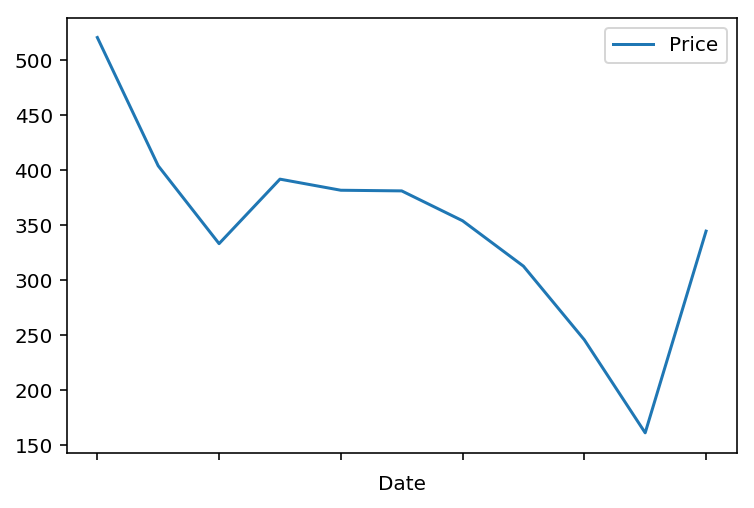

In [4]:
df2 = df.groupby(['Date']).mean()
df_plot = df2.plot()

In [5]:
fig = df_plot.get_figure()
filename = 'Delta_LAS.png'
fig.savefig(filename)
fig.clear()